In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Geometric Distribution

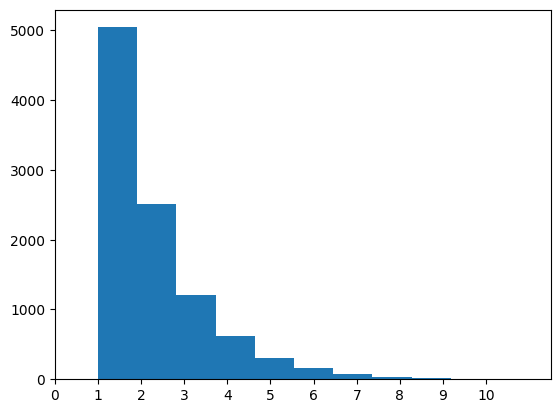

In [4]:
def getGeo(p = 0.5, size = 10000):
    us = np.random.uniform(0, 1, size)
    x = np.floor(np.log(us)/np.log(1 - p)) + 1
    return x


vals = getGeo(.5)
plt.hist(vals, bins = len(np.unique(vals)))
plt.xticks(np.arange(np.max(np.unique(vals))))
plt.show()

Crude Method

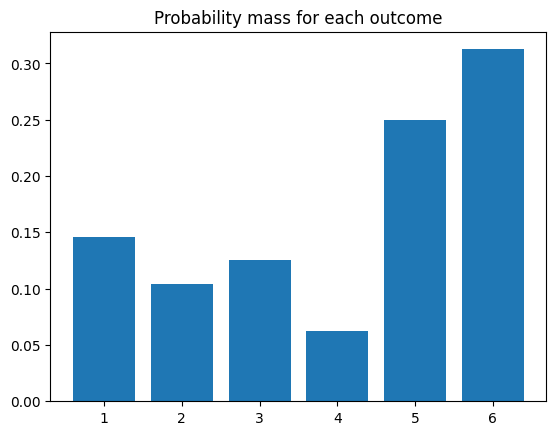

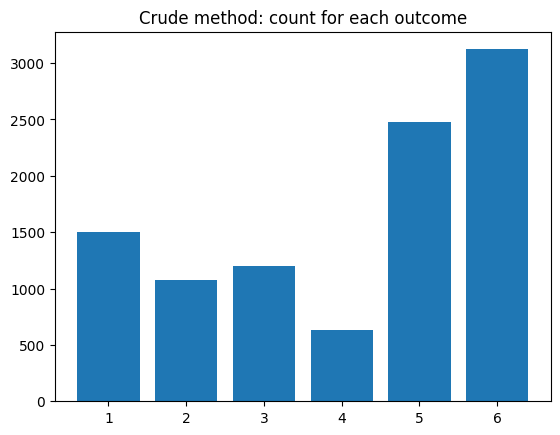

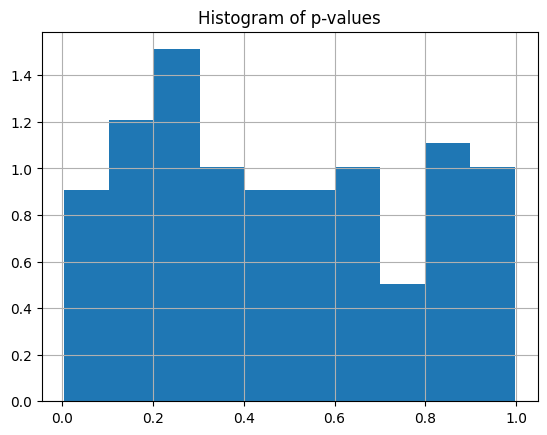

Power_divergenceResult(statistic=6.162605714285733, pvalue=0.29071674023222976)

In [12]:
p = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]

def crude(p, size = 10000):
    us = np.random.uniform(0, 1, size)
    cdf = np.cumsum(p)
    k = len(p)
    vals = [k - np.sum(cdf>=u) + 1 for u in us]
    return vals

vals = crude(p)
plt.bar(range(1, 7), p)
plt.title('Probability mass for each outcome')
plt.show()

unique_outcomes = np.arange(1,7)
counts = [np.sum(vals == u) for u in unique_outcomes]
plt.figure()
plt.bar(range(1, 7), counts)
plt.title('Crude method: count for each outcome')
plt.show()

pvals = []
for i in range(100):
    vals = crude(p)
    counts = np.array([np.sum(vals == u) for u in unique_outcomes])
    pvals.append(stats.chisquare(counts, np.array(p)*len(vals))[1])

plt.figure()
plt.hist(pvals, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()

Rejection Method

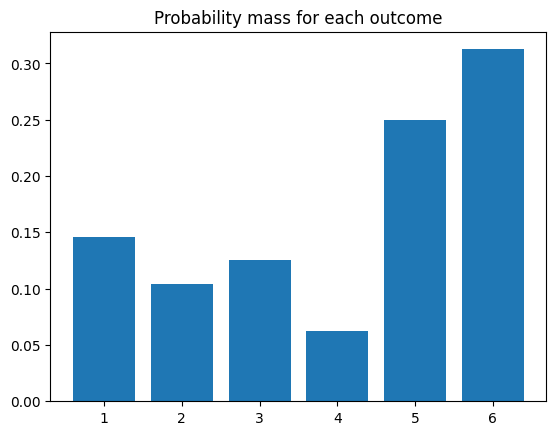

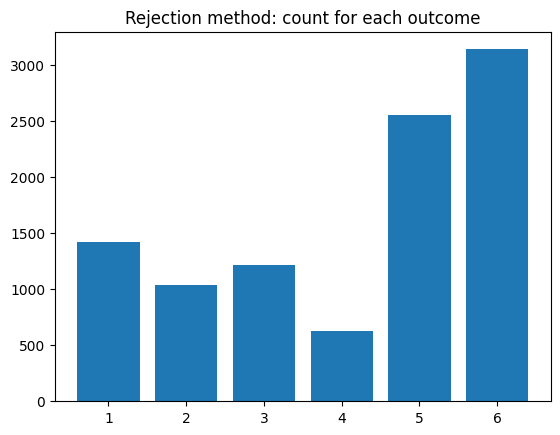

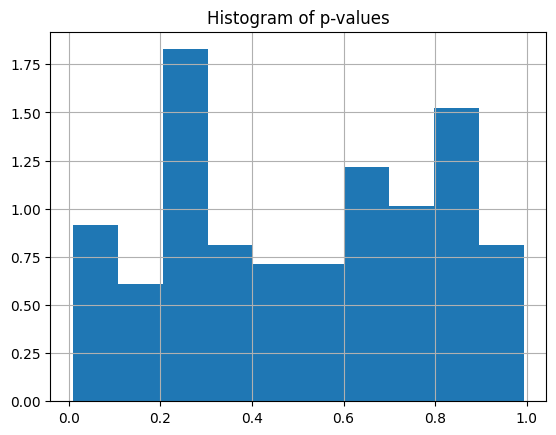

In [13]:
def rejection(p, size = 10000):
    vals = []
    k = len(p)
    C = 2
    while(len(vals)<size):
        u1, u2 = np.random.uniform(0,1,2)
        I = int(np.floor(k * u1) + 1)
        if u2 <= p[I-1]/C:
            vals.append(I)
    return vals

p = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
vals = rejection(p)
plt.bar(range(1, 7), p)
plt.title('Probability mass for each outcome')
plt.show()

unique_outcomes = np.arange(1,7)
counts = [np.sum(vals == u) for u in unique_outcomes]
plt.figure()
plt.bar(range(1, 7), counts)
plt.title('Rejection method: count for each outcome')
plt.show()

pvals = []
for i in range(100):
    vals = rejection(p)
    counts = np.array([np.sum(vals == u) for u in unique_outcomes])
    pvals.append(stats.chisquare(counts, np.array(p)*len(vals))[1])

plt.figure()
plt.hist(pvals, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()

Alias Method

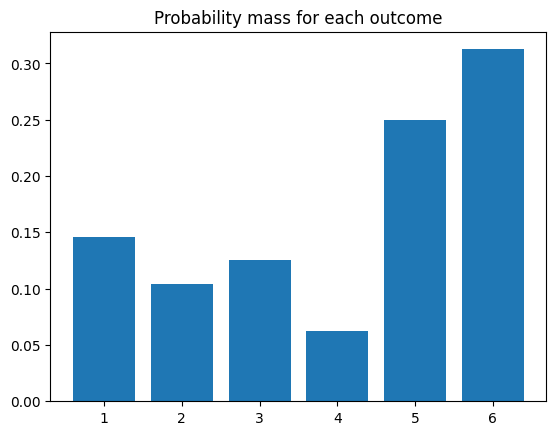

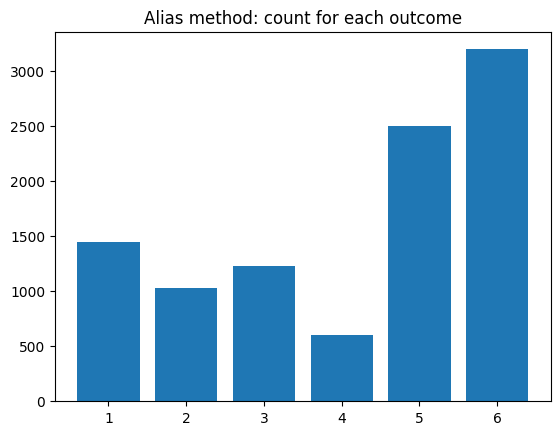

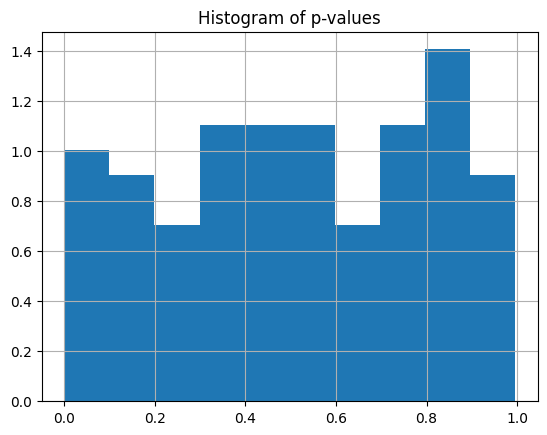

In [14]:
def alias(p, size = 10000):
    k = len(p)
    L = np.arange(k)
    F = k * np.array(p)
    G = np.where(F>=1)[0]
    S = np.where(F<=1)[0]
    while(S.shape[0]!=0):
        i = G[0]
        j = S[0]
        L[j] = i + 1
        F[i] = F[i] - 1 + F[j]
        if(F[i] < 1 - 1e-7):
            G = G[1:]
            S = np.append(S, i)
        S = S[1:]

    vals = []
    k = len(p)
    
    while(len(vals)<size):
        u1, u2 = np.random.uniform(0,1,2)
        I = int(np.floor(k * u1) + 1)
        if u2 <= F[I-1]:
            vals.append(I)
        else:
            vals.append(L[I-1])
    return vals

p = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
vals = alias(p)
plt.bar(range(1, 7), p)
plt.title('Probability mass for each outcome')
plt.show()

unique_outcomes = np.arange(1,7)
counts = [np.sum(vals == u) for u in unique_outcomes]
plt.figure()
plt.bar(range(1, 7), counts)
plt.title('Alias method: count for each outcome')
plt.show()

pvals = []
for i in range(100):
    vals = alias(p)
    counts = np.array([np.sum(vals == u) for u in unique_outcomes])
    pvals.append(stats.chisquare(counts, np.array(p)*len(vals))[1])

plt.figure()
plt.hist(pvals, density = True)
plt.grid()
plt.title('Histogram of p-values')
plt.show()
